In [2]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv("C:/Users/HomePC/Desktop/Decision Tree/Dataset_of_Diabetes.csv")

In [4]:
dataset.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
# checking the columns  in the dataset
dataset.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [6]:
# checking the shaoe of the dataset
dataset.shape

(1000, 14)

In [7]:
# Checking the data type of each column
dataset.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

Note: Gender and CLASS are categorical

In [8]:
# Checking missing values
dataset.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [9]:
# Checking unique values in the CLASS column
print(dataset["CLASS"].unique())

['N' 'N ' 'P' 'Y' 'Y ']


In [10]:
dataset["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

# Formatting "CLASS" column

In [11]:
# Convert the 'CLASS' column to string type
dataset['CLASS'] = dataset['CLASS'].astype(str)

# Remove extra spaces from 'CLASS' values
dataset['CLASS'] = dataset['CLASS'].str.strip()

#mapping the values
class_mapping = {
    'N': 'Non-diabetic',
    'P': 'Prediabetic',
    'Y': 'Diabetic'
}

dataset['CLASS'] = dataset['CLASS'].map(class_mapping)
print(dataset['CLASS'].unique())

['Non-diabetic' 'Prediabetic' 'Diabetic']


In [12]:
# Rechecking the value counts
dataset["CLASS"].value_counts()

CLASS
Diabetic        844
Non-diabetic    103
Prediabetic      53
Name: count, dtype: int64

In [13]:
# Changing other columns to numeric
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
for col in numeric_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [14]:
# Rechecking the missing values again
dataset.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [15]:
# Checking the column "Gender"
print(dataset["Gender"])

0      F
1      M
2      F
3      F
4      M
      ..
995    M
996    M
997    M
998    M
999    M
Name: Gender, Length: 1000, dtype: object


In [16]:
dataset.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-diabetic
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-diabetic
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-diabetic
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-diabetic
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-diabetic


In [28]:
# Encoding Categorical Columns
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['CLASS'] = label_encoder.fit_transform(dataset['CLASS'])

In [29]:
dataset.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [30]:
# Rechecking the missing values
dataset.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [34]:
encoded_dataset = dataset.drop(["ID", "No_Pation"], axis=1)

In [35]:
encoded_dataset.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [36]:
encoded_dataset.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.567000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,0.209000
std,0.497754,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.521144
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,0.000000
50%,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,0.000000
75%,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,0.000000
max,2.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


# Heatmap Correlation

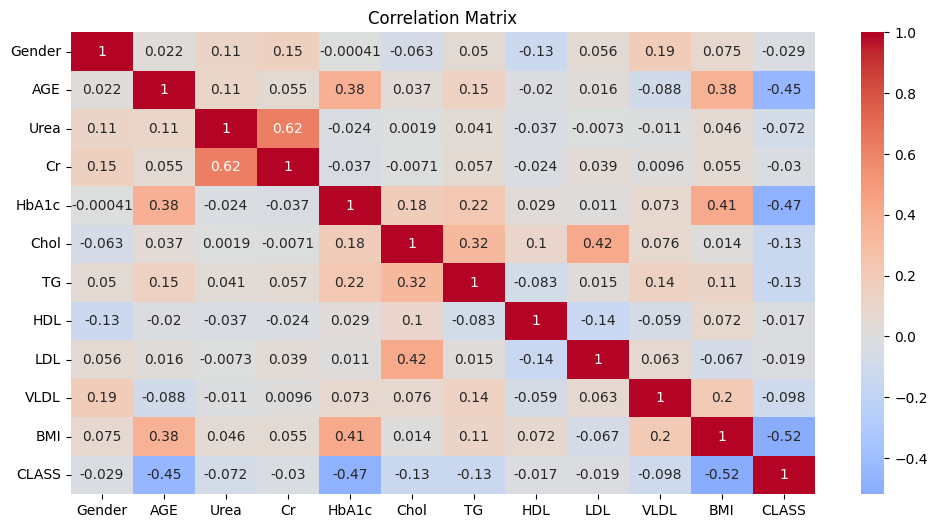

"\n1.  sns.heatmap(...)\nsns is an alias for Seaborn, a popular data visualization library built on top of matplotlib.\n\n2. heatmap() is a function that creates a 2D color-coded matrix to represent data values — in this case, correlations.\n\n3. encoded_dataset.corr()\na. encoded_dataset is likely a DataFrame containing numerical features (maybe after encoding categorical columns).\n\nb. .corr() calculates the correlation matrix between all numerical columns.\n\nThe result is a square matrix where:\n\nEach cell represents the correlation coefficient between two features.\n\nValues range from -1 (perfect negative correlation) to +1 (perfect positive correlation).\n\n4. annot=True\nTells Seaborn to annotate each cell with the actual correlation value.\n\nMakes the heatmap more informative.\n\n5. cmap='coolwarm'\nSpecifies the colormap (color gradient).\n\n'coolwarm' uses:\n\n- Cool colors (blue) for negative correlations.\n\n- Warm colors (red) for positive correlations.\n\n- White/neut

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(encoded_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

'''
1.  sns.heatmap(...)
sns is an alias for Seaborn, a popular data visualization library built on top of matplotlib.

2. heatmap() is a function that creates a 2D color-coded matrix to represent data values — in this case, correlations.

3. encoded_dataset.corr()
a. encoded_dataset is likely a DataFrame containing numerical features (maybe after encoding categorical columns).

b. .corr() calculates the correlation matrix between all numerical columns.

The result is a square matrix where:

Each cell represents the correlation coefficient between two features.

Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

4. annot=True
Tells Seaborn to annotate each cell with the actual correlation value.

Makes the heatmap more informative.

5. cmap='coolwarm'
Specifies the colormap (color gradient).

'coolwarm' uses:

- Cool colors (blue) for negative correlations.

- Warm colors (red) for positive correlations.

- White/neutral for near-zero correlation.

6. center=0
Sets 0 as the midpoint of the colormap.

This is helpful because correlation values are centered around zero, so it makes interpretation easier (visually balances the color scale).
'''

# Distribution of Target Variables

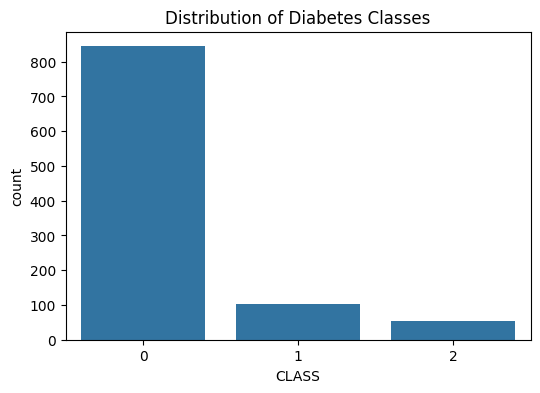

In [44]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=encoded_dataset)
plt.title('Distribution of Diabetes Classes')
plt.show()

# Boxplot for Numerical Features

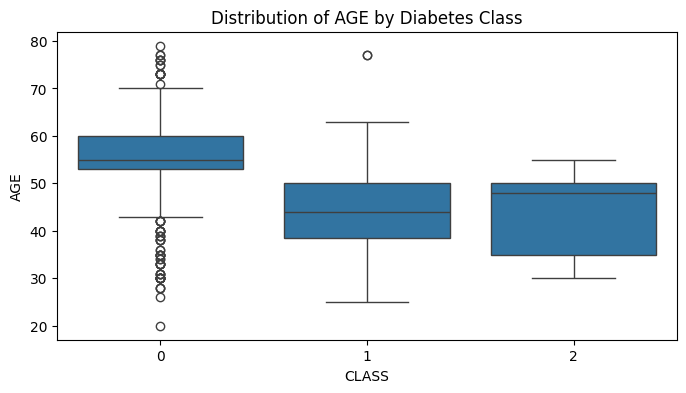

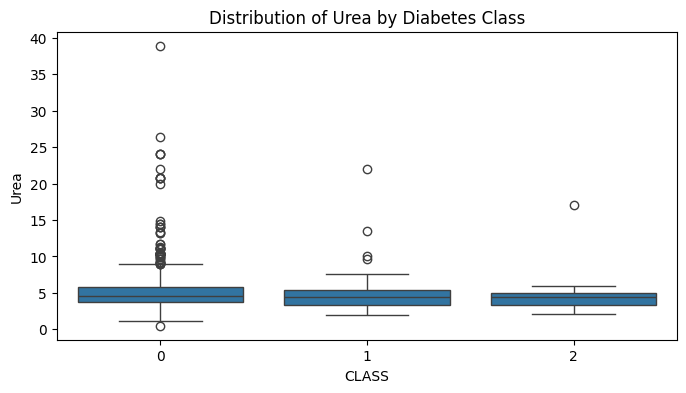

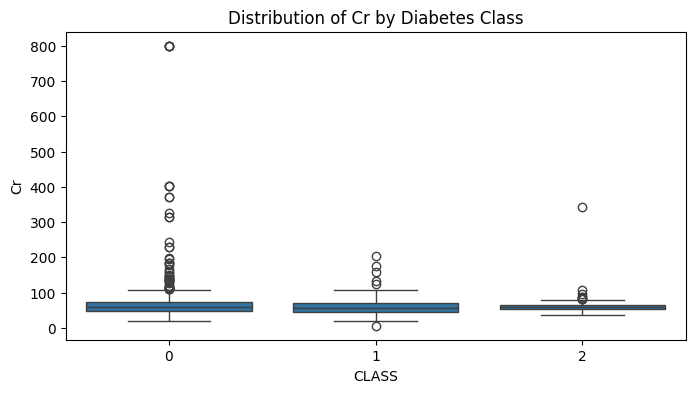

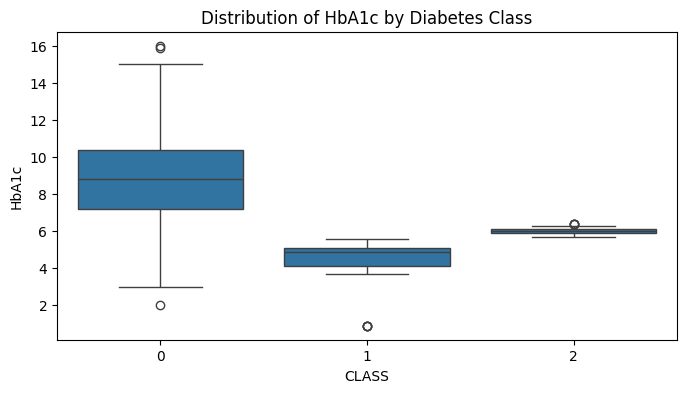

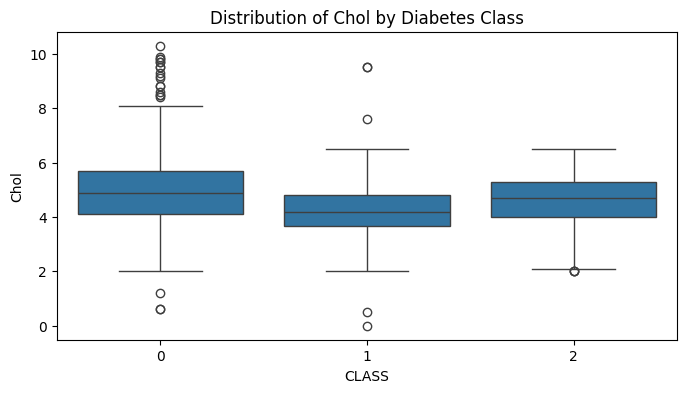

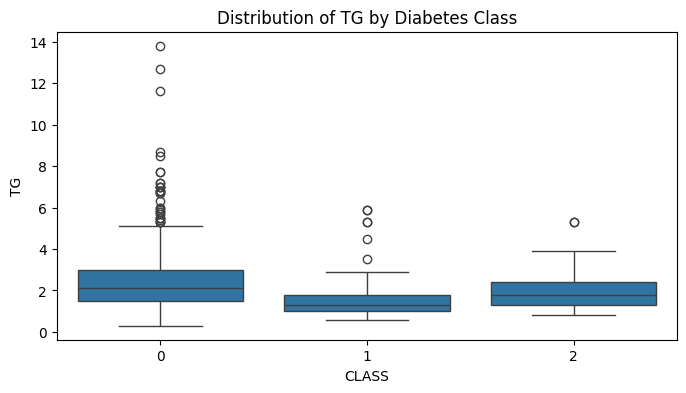

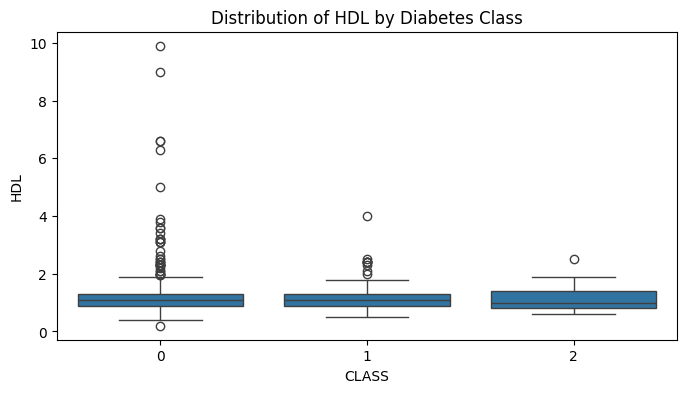

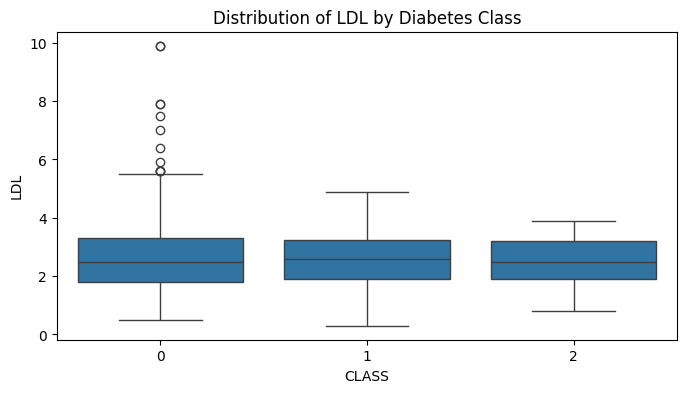

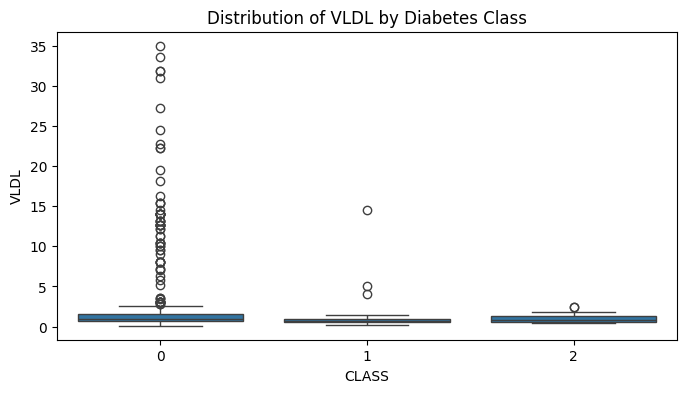

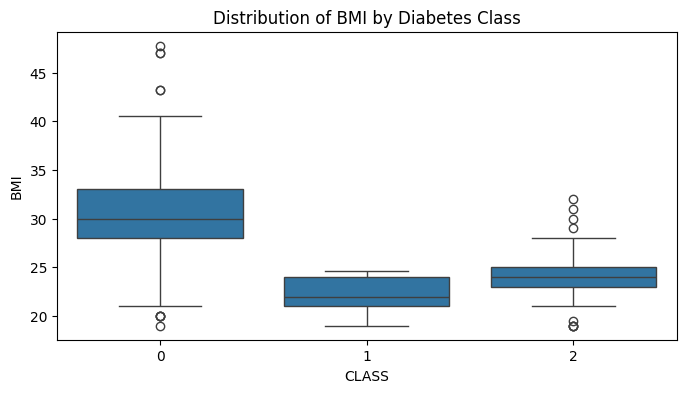

In [45]:
# Boxplots for numeric features by class
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='CLASS', y=col, data=encoded_dataset)
    plt.title(f'Distribution of {col} by Diabetes Class')
    plt.show()

In [ ]:
# Decis